In [1]:
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_options = pd.read_csv("optionsSPY.csv")

In [3]:
# df_options.shape

In [4]:
# df_options.head()

In [5]:
df2 = df_options[df_options["Open"].notna()]

In [6]:
# df2.head(10)

In [7]:
# df2.shape

In [8]:
# df2['#RIC'].nunique()

In [9]:
# df2.tail(10)

In [10]:
rics = df2['#RIC']

In [11]:
# print(len(rics))

In [12]:
# return root,strike,expiry,type - eg. MSFT,157.70,2020-01-17,call
def parse_opra_ric(opra_ric: str) -> Tuple[str, float, str, str]:
    # skip null values - but, why are any of these null?
    if pd.isnull(opra_ric):
        return (None,None,None,None)

    try:
        ric, exchange_code = tuple(opra_ric.split("."))
    except:
        print(opra_ric)
        return(None,None,None,None)

    if exchange_code not in ["U"]:
        return (None,None,None,None)

    root_len = len(ric) - OPRA_NONROOT_LEN
    #root_len = len(ric)
    root = ric[:root_len]

    expiry_day = ric[-9:-7]
    raw_expiry_year = ric[-7:-5]
    if int(raw_expiry_year) <= 72:
        expiry_year = "20"+raw_expiry_year
    else:
        expiry_year = "19"+raw_expiry_year
    
    raw_expiry_month_put_or_call = ric[-10:-9]
    strike_ge_1000 = raw_expiry_month_put_or_call.islower()

    if ord(raw_expiry_month_put_or_call.upper()) <= (12 + ORD_UPPERCASE_ADJ_CALLS):
        contract_type = "call"
        expiry_month = str(ord(raw_expiry_month_put_or_call.upper()) - ORD_UPPERCASE_ADJ_CALLS).zfill(2)
    else:
        contract_type = "put"
        expiry_month = str(ord(raw_expiry_month_put_or_call.upper()) - ORD_UPPERCASE_ADJ_PUTS).zfill(2)

    expiry = f"{expiry_year}-{expiry_month}-{expiry_day}"

    if strike_ge_1000:
        strike = float(ric[-5:]) / 10
    else:
        strike = float(ric[-5:]) / 100

    return (root, strike, expiry, contract_type)

In [13]:
# ric_tuple = [None]*len(rics)

# for i in range(len(rics)):
    
#     if rics.iloc[i] != "SPY":
        
#         ric_tuple[i] = parse_opra_ric(rics.iloc[i])
    

In [14]:
ORD_UPPERCASE_ADJ_CALLS = 64
ORD_UPPERCASE_ADJ_PUTS = 76
OPRA_NONROOT_LEN = 10

In [15]:
spy_df = df2[df2["#RIC"] == "SPY"]

In [16]:
options_df = df2[df2["#RIC"] != "SPY"]

In [17]:
rics = options_df["#RIC"]

In [18]:
ric_tuple = [None]*len(options_df)

for i in range(len(options_df)):
    
    ric_tuple[i] = parse_opra_ric(rics.iloc[i])

In [19]:
# print(options_df["#RIC"].iloc[8])

In [20]:
# ric_tuple[8]

In [21]:
# rics.iloc[8]

In [22]:
# print(ric_tuple[1111111])

In [23]:
# options_df.columns

In [24]:
columns_to_drop = ['Alias Underlying RIC', 'Domain', 'Type', 'Open Bid', 'High Bid',
       'Low Bid', 'Close Bid', 'No. Bids', 'Open Ask', 'High Ask', 'Low Ask',
       'Close Ask', 'No. Asks']

In [25]:
options_df1 = options_df.drop(columns_to_drop, axis=1)

In [26]:
# print(options_df1.head(15))

In [27]:
# options_df1.dtypes

In [28]:
# print(options_df1.head(15))

In [29]:
tuple_df = pd.DataFrame(ric_tuple, columns = ["Root", "Strike", "Expiry", "Option Type"])

In [30]:
# print(tuple_df.head(15))

In [31]:
options_df1.reset_index(drop=True,inplace=True)
tuple_df.reset_index(drop=True,inplace=True)

In [32]:
# tuple_df

In [33]:
options_df2 = pd.concat([options_df1, tuple_df], axis=1)

In [34]:
# options_df2.head(10)

In [35]:
# tuple_df

In [36]:
# options_df1

In [37]:
spy_df1 = spy_df.drop(columns_to_drop, axis=1)

In [38]:
spy_df1.reset_index(drop=True,inplace=True)

In [39]:
# spy_df1.tail(10)

In [40]:
# print(spy_df1.index)

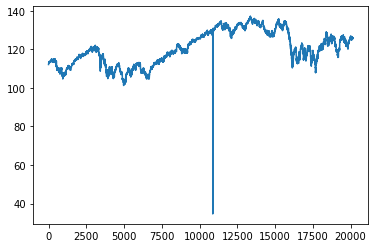

In [41]:
plt.plot(spy_df1['Last'])
plt.show()

In [42]:
print(spy_df1[spy_df1['Last'] < 100])

      #RIC                         Date-Time    Open    High    Low   Last  \
10871  SPY  2011-01-31T16:45:00.000000000-05  128.64  128.69  34.65  34.65   

        Volume  No. Trades  
10871  31772.0        27.0  


In [43]:
dates = [None] * len(spy_df1)
for i in range(len(spy_df1)):
    dates[i] = spy_df1['Date-Time'][i][0:10]
spy_df1 = spy_df1.drop(10871)

In [106]:
#spy_df1 = spy_df1.drop(10871)

In [46]:
returns = spy_df1['Last'].pct_change().dropna()

In [47]:
returns.std()

0.0021383148729883067

In [48]:
S0 = 100
mu = returns.mean()
sig = returns.std()
#sig = 0.02
T = 1
N = 100
deltaT = T/N
lam = 0.05
theta = 1.1
paths = 100

In [49]:
# S_t = [None] * (N+1)
# S_t[0] = S0

# for i in range(1, N+1):
#     #S_t[i] = S_t[i-1]*(1 + theta*np.random.poisson(lam)*deltaT + mu*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))
#     S_t[i] = S_t[i-1]*(1 + theta*np.random.poisson(lam)*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))


In [50]:
# plt.plot(S_t)
# plt.show()

In [51]:
paths = 5
sig = 0.02
S_t = [None] * paths


for i in range(paths):
    S_t[i] = [None]*(N+1)
    S_t[i][0] = S0
    
    for j in range(1, N+1):
        #S_t[i][j] = S_t[i][j-1]*(1 + theta*np.random.poisson(lam)*deltaT + mu*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))
        S_t[i][j] = S_t[i][j-1]*(1 + theta*np.random.poisson(lam)*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))

    
sig = returns.std()

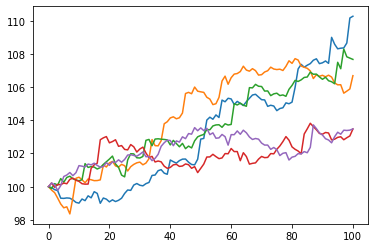

In [52]:
for i in range(paths):
    plt.plot(S_t[i])
plt.show()

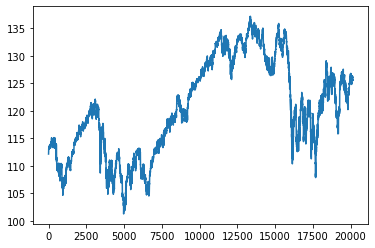

In [53]:
plt.plot(spy_df1['Last'])
plt.show()

In [ ]:
# print(spy_df1['Date-Time'][0][0:10])

In [ ]:
# len(spy_df1)

In [ ]:
# dates = [None] * len(spy_df1)
# for i in range(len(spy_df1)):
#     dates[i] = spy_df1['Date-Time'][i][0:10]

In [54]:
dates.pop(10871)

#spy_df1['Dates'] = dates

'2011-01-31'

In [55]:
# len(dates)

In [56]:
spy_df1["Dates"] = dates
spy_df1

,#RIC,Date-Time,Open,High,Low,Last,Volume,No. Trades,Dates
0,SPY,2010-01-04T08:00:00.000000000-05,112.12,112.18,111.44,112.14,1765282.0,428.0,2010-01-04
1,SPY,2010-01-04T08:15:00.000000000-05,112.14,112.16,112.09,112.15,682644.0,674.0,2010-01-04
2,SPY,2010-01-04T08:30:00.000000000-05,112.16,112.23,112.14,112.22,988952.0,873.0,2010-01-04
3,SPY,2010-01-04T08:45:00.000000000-05,112.22,112.33,112.22,112.32,378532.0,1167.0,2010-01-04
4,SPY,2010-01-04T09:00:00.000000000-05,112.33,112.46,112.33,112.39,554833.0,1641.0,2010-01-04
...,...,...,...,...,...,...,...,...,...
20146,SPY,2011-12-30T16:45:00.000000000-05,125.63,125.64,125.45,125.50,173197.0,420.0,2011-12-30
20147,SPY,2011-12-30T17:00:00.000000000-05,125.51,125.63,125.49,125.60,104651.0,193.0,2011-12-30
20148,SPY,2011-12-30T17:15:00.000000000-05,125.60,125.65,125.60,125.63,28035.0,63.0,2011-12-30
20149,SPY,2011-12-30T17:30:00.000000000-05,125.64,125.64,125.58,125.58,9734.0,19.0,2011-12-30


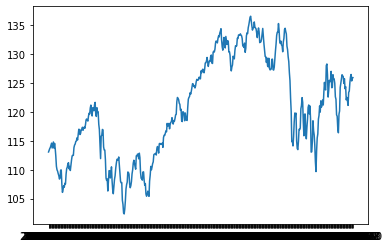

In [57]:
plt.plot(spy_df1[['Dates', 'Last']].groupby('Dates').mean())
plt.show()

In [ ]:
# print(spy_df1[spy_df1['Low'] < 100])

In [ ]:
# spy_df1.iloc[10871]

In [ ]:
# S_t = [None] * (N+1)
# S_t[0] = S0

# for i in range(1, N+1):
#     S_t[i] = S_t[i-1]*np.exp(((mu-lam*k-(sig**2)/2)*deltaT) + sig*np.random.normal(0,1)*np.sqrt(deltaT)) 


In [58]:
returns

1        0.000089
2        0.000624
3        0.000891
4        0.000623
5       -0.000267
           ...   
20146   -0.001035
20147    0.000797
20148    0.000239
20149   -0.000398
20150    0.000319
Name: Last, Length: 20149, dtype: float64

In [ ]:
# for i in range(1,len(returns)): 
#     if (returns[i] > 2*sig) or (returns[i] < 2*sig):
#         print("jump")

In [ ]:
# (returns < -2*sig).any()

In [63]:
sig = returns.std()

In [64]:
frame = {'Date-Time': spy_df1['Date-Time'],
         'Return': returns}

result = pd.DataFrame(frame).dropna()

In [65]:
down_jumps = result[result["Return"] < -2*sig]
up_jumps = result[result["Return"] > 2*sig]

In [66]:
down_jumps

,Date-Time,Return
162,2010-01-08T08:30:00.000000000-05,-0.005510
240,2010-01-12T08:00:00.000000000-05,-0.004803
360,2010-01-15T08:00:00.000000000-05,-0.005388
475,2010-01-20T16:45:00.000000000-05,-0.005197
489,2010-01-21T10:15:00.000000000-05,-0.009902
...,...,...
19660,2011-12-13T15:15:00.000000000-05,-0.004383
19669,2011-12-13T17:30:00.000000000-05,-0.013922
19802,2011-12-19T10:45:00.000000000-05,-0.004344
19819,2011-12-19T15:00:00.000000000-05,-0.006607


In [67]:
up_jumps

,Date-Time,Return
476,2010-01-20T17:00:00.000000000-05,0.005401
518,2010-01-21T17:30:00.000000000-05,0.022878
560,2010-01-25T08:00:00.000000000-05,0.009885
608,2010-01-26T10:00:00.000000000-05,0.005994
666,2010-01-27T14:30:00.000000000-05,0.005790
...,...,...
19711,2011-12-15T08:00:00.000000000-05,0.007723
19791,2011-12-19T08:00:00.000000000-05,0.005844
19831,2011-12-20T08:00:00.000000000-05,0.009548
19837,2011-12-20T09:30:00.000000000-05,0.007039


In [68]:
jumps_df = pd.concat([up_jumps, down_jumps])

In [69]:
jumps_df

,Date-Time,Return
476,2010-01-20T17:00:00.000000000-05,0.005401
518,2010-01-21T17:30:00.000000000-05,0.022878
560,2010-01-25T08:00:00.000000000-05,0.009885
608,2010-01-26T10:00:00.000000000-05,0.005994
666,2010-01-27T14:30:00.000000000-05,0.005790
...,...,...
19660,2011-12-13T15:15:00.000000000-05,-0.004383
19669,2011-12-13T17:30:00.000000000-05,-0.013922
19802,2011-12-19T10:45:00.000000000-05,-0.004344
19819,2011-12-19T15:00:00.000000000-05,-0.006607


In [70]:
# jumps_df['Return'].std()

In [71]:
# sig

In [72]:
# jumps_df["Return"].mean()

In [73]:
# lambda
len(jumps_df)/len(returns)

0.038513077572087946

In [74]:
S0 = 100
mu = returns.mean()
sig = returns.std()
T = 1
N = 100
deltaT = T/N
lam = len(jumps_df)/len(returns)
theta = 1+(jumps_df['Return'].mean())
paths = 100

In [75]:
S_t = [None] * paths

sig = 0.2
for i in range(paths):
    S_t[i] = [None]*(N+1)
    S_t[i][0] = S0
    
    for j in range(1, N+1):
        S_t[i][j] = S_t[i][j-1]*(1 + theta*np.random.poisson(lam)*deltaT + mu*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))
        #S_t[i][j] = S_t[i][j-1]*(1 + theta*np.random.poisson(lam)*deltaT + sig*np.random.normal(0,1)*np.sqrt(deltaT))

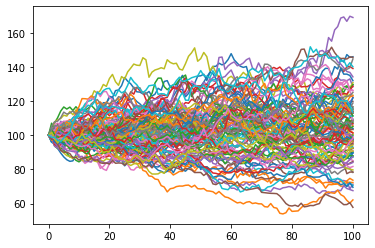

In [76]:
for i in range(paths):
    plt.plot(S_t[i])
plt.show()

In [77]:
# jumps_df['Return'].mean()

$S(t) = S(0)e^{(\mu - \frac{\sigma^2}{2})t + \sigma W(t)} \prod_{i=1}^{N(t)} Y_i $

$Y_i = e^{X_i}$ $\rightarrow$ $\prod_{i=1}^{N(t)} Y_i = e^{\sum_{i=1}^{N(t)} X_i} $

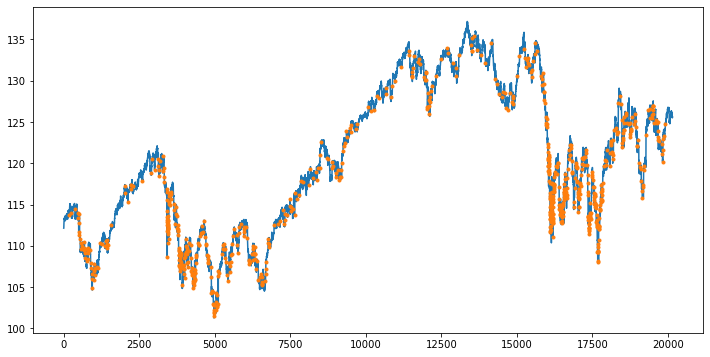

In [78]:
plt.figure(figsize=(12,6))
plt.plot(spy_df1['Last'])
plt.plot(spy_df1['Last'], ".", markevery=jumps_df.index)

plt.show()

In [ ]:
# jumps_df.index

In [79]:
# plt.figure(figsize=(12,6))
# plt.plot(spy_df1['Last'][0:2500])
# plt.plot(spy_df1['Last'][0:2500], ".", markevery=jumps_df[jumps_df.index < 2500])

# plt.show()

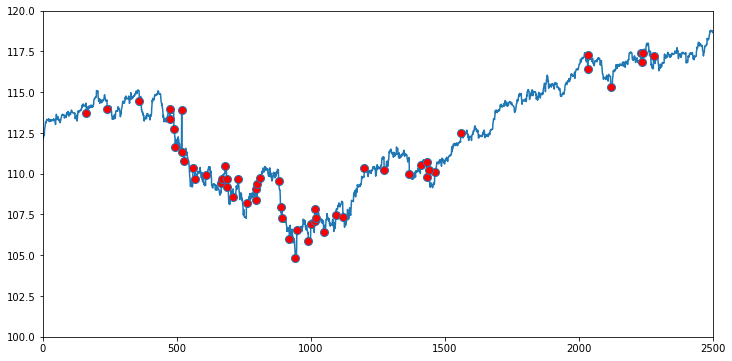

In [80]:
plt.figure(figsize=(12,6))
plt.xlim(0,2500)
plt.ylim(100,120)
#plt.plot(spy_df1['Last'])
plt.plot(spy_df1['Last'], marker='o', markersize=8, markerfacecolor='red', markevery=jumps_df.index)
#plt.plot(spy_df1['Last'], '.', markevery=jumps_df.index)
plt.show()

In [83]:
log_S = np.log(spy_df1["Last"])
log_S.reset_index(drop=True,inplace=True)
log_S

0        4.719748
1        4.719837
2        4.720461
3        4.721352
4        4.721975
           ...   
20145    4.832306
20146    4.833102
20147    4.833341
20148    4.832943
20149    4.833261
Name: Last, Length: 20150, dtype: float64

In [84]:
#print(log_S)
K = 252*len(spy_df1)/504
# or
K = np.sqrt(252*len(spy_df1)/504)
sig_sq_i2 = [None]*len(log_S)
for i in range(2,len(log_S)):
    sig_sq_i2[i] = abs(log_S[i]/log_S[i-1])*abs(log_S[i-1]/log_S[i-2])

In [86]:
sum(sig_sq_i2[2:len(sig_sq_i2)])*(1/np.sqrt(252*len(spy_df1)/504))

200.72918311408623

In [89]:
# sig_sq_i2

In [ ]:
log_S.reset_index(drop=True,inplace=True)

In [90]:
sum(sig_sq_i2[2:len(sig_sq_i2)])

20148.051144167945

In [91]:
sig_sq_i3 = abs(log_S/log_S.shift(1))*abs(log_S.shift(1)/log_S.shift(2))

In [92]:
sig_sq_hat = sum(sig_sq_i3[2:len(sig_sq_i3)])*(1/np.sqrt(252*len(spy_df1)/504))
sig_sq_hat

200.72918311408623

In [93]:
K = np.sqrt(252*len(spy_df1)/504)
#K = 252*len(spy_df1)/504

In [94]:
K = int(np.ceil(K))
K =1000

In [95]:
sig_sq_i4 = [0]*len(log_S)
for i in range(K, len(log_S)):
#     print(i)
#     print(sig_sq_i4[i-1])
    for j in range(i-K+2, i-1):
        #print(j)
        sig_sq_i4[i] += (1/(K-2)) * abs(log_S[j]/log_S[j-1]) * abs(log_S[j-1]/log_S[j-2])
    

In [96]:
sig_sq_i4.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [97]:
S = pd.Series(sig_sq_i4)
S.value_counts()

0.000000    1000
0.999011       2
0.999010       2
0.998986       2
0.998997       1
            ... 
0.999026       1
0.999026       1
0.999026       1
0.999026       1
0.999029       1
Name: count, Length: 19148, dtype: int64

In [98]:
L_i = [0]*len(log_S)
for i in range(K, len(log_S)):
    L_i[i] = abs(log_S[i]/log_S[i-1]) / sig_sq_i4[i]

In [101]:
min(L_i[K:len(L_i)])

0.9917967404394049

In [100]:
sig_sq_i4[K:len(sig_sq_i4)]

[0.9989736180095585,
 0.9989735274814084,
 0.9989753066195393,
 0.9989771852237935,
 0.9989775705092135,
 0.9989769896334917,
 0.9989758235332238,
 0.9989756641470885,
 0.9989752656413545,
 0.9989743800265131,
 0.9989745921315977,
 0.9989750891879341,
 0.9989743745249426,
 0.998973276085438,
 0.9989722687519795,
 0.9989715571904898,
 0.9989728261600708,
 0.9989746399547483,
 0.9989760256249692,
 0.9989771781813908,
 0.9989759936642674,
 0.9989752042336589,
 0.9989760289373172,
 0.9989760707490646,
 0.9989759489472281,
 0.9989759449740493,
 0.9989756592103326,
 0.9989753776660165,
 0.9989752049133147,
 0.9989750324680586,
 0.9989753087060513,
 0.9989759199486318,
 0.9989757766758793,
 0.9989750589015033,
 0.9989744808772549,
 0.9989743170118774,
 0.9989744331476393,
 0.9989746092899596,
 0.9989745931909269,
 0.9989743888206051,
 0.9989744449254041,
 0.9989746331345045,
 0.9989742166916777,
 0.9989741419003889,
 0.9989744396981851,
 0.9989746190095997,
 0.9989751071166304,
 0.99897457017

In [102]:
L_i[K:len(L_i)]

[1.0030245183764117,
 1.0012278239049106,
 1.001285797992972,
 1.0008239011639453,
 1.0009434233225838,
 1.0012641454309337,
 1.0008652362717663,
 1.0008251981864305,
 1.001466040649677,
 1.0010268727724707,
 1.0005461482893778,
 1.000745264393865,
 1.0004036460667343,
 1.0008464459550805,
 1.002515488343049,
 1.0014289567058656,
 1.002003367436816,
 1.0011652204811499,
 0.9998524050605008,
 1.0014643733122415,
 1.001062868535363,
 1.0007869276375485,
 1.0011843677983572,
 1.001104595188308,
 1.0007861815739365,
 1.0009453867032543,
 1.000885801850209,
 1.0008061039073632,
 1.0016242736488508,
 1.001225004945712,
 1.000627664859807,
 1.000706007053291,
 1.000785542250905,
 1.0010459853361955,
 1.0010665508297798,
 1.001106668408666,
 1.0009866604867494,
 1.0010863816507662,
 1.00096652449984,
 1.0011065783416433,
 1.0005867454343573,
 1.0014664750876965,
 1.0008470020319546,
 1.0010868839891045,
 1.0009866358125483,
 1.000866443075021,
 1.0008057271428161,
 1.0013467942155079,
 0.99968

In [105]:
L_i2 = abs(log_S/log_S.shift(1)) / sig_sq_i4
L_i2[K:len(L_i2)]

1000     1.003025
1001     1.001228
1002     1.001286
1003     1.000824
1004     1.000943
           ...   
20145    1.000757
20146    1.001137
20147    1.001021
20148    1.000889
20149    1.001038
Name: Last, Length: 19150, dtype: float64